# Evaluating best performing model - XGBoost

## Given the Shipping E-commerce Sales data can we predict if the package will arrive on time?

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import numpy as np

In [21]:
df = pd.read_csv("shipping_ecommerce.csv")
df_model = df
df_dum = pd.get_dummies(df_model)

In [22]:
df_dum.head()

,Customer_care_calls,Customer_rating,Prior_purchases,Discount_offered,Weight_in_gms,Class,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
0,5,4,2,10,5395,1,1,0,0,0,0,0,0,1,0,0,1,0,1
1,4,3,2,6,5867,0,0,0,0,0,1,0,0,1,0,0,1,1,0
2,3,4,2,2,5957,0,0,0,0,1,0,0,0,1,0,0,1,0,1
3,3,1,2,27,2551,1,0,0,0,1,0,0,0,1,0,0,1,0,1
4,7,5,4,9,1329,1,0,1,0,0,0,0,0,1,0,0,1,0,1


In [23]:
df_dum.astype('float64').dtypes

Customer_care_calls          float64
Customer_rating              float64
Prior_purchases              float64
Discount_offered             float64
Weight_in_gms                float64
Class                        float64
Warehouse_block_A            float64
Warehouse_block_B            float64
Warehouse_block_C            float64
Warehouse_block_D            float64
Warehouse_block_F            float64
Mode_of_Shipment_Flight      float64
Mode_of_Shipment_Road        float64
Mode_of_Shipment_Ship        float64
Product_importance_high      float64
Product_importance_low       float64
Product_importance_medium    float64
Gender_F                     float64
Gender_M                     float64
dtype: object

In [24]:
df_dum.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_care_calls,10998.0,4.054555,1.141497,2.0,3.00,4.0,5.00,7.0
Customer_rating,10998.0,2.990453,1.413635,1.0,2.00,3.0,4.00,5.0
Prior_purchases,10998.0,3.567558,1.522924,2.0,3.00,3.0,4.00,10.0
Discount_offered,10998.0,13.373704,16.206183,1.0,4.00,7.0,10.00,65.0
Weight_in_gms,10998.0,3633.873522,1635.382636,1001.0,1839.25,4149.0,5049.75,7846.0
Class,10998.0,0.596745,0.490573,0.0,0.00,1.0,1.00,1.0
Warehouse_block_A,10998.0,0.166576,0.372614,0.0,0.00,0.0,0.00,1.0
Warehouse_block_B,10998.0,0.166667,0.372695,0.0,0.00,0.0,0.00,1.0
Warehouse_block_C,10998.0,0.166667,0.372695,0.0,0.00,0.0,0.00,1.0
Warehouse_block_D,10998.0,0.166758,0.372776,0.0,0.00,0.0,0.00,1.0


In [25]:
X = df_dum.drop('Class', axis=1)
y = df_dum.Class.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [26]:
xg_model = XGBClassifier(objective='binary:logistic', random_state=42, eval_metric=['error', 'logloss'])

eval_set = [(X_train, y_train), (X_test, y_test)]
xg_model.fit(X_train, y_train, eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.30314	validation_0-logloss:0.61694	validation_1-error:0.33818	validation_1-logloss:0.62236
[1]	validation_0-error:0.29814	validation_0-logloss:0.57388	validation_1-error:0.34182	validation_1-logloss:0.58412
[2]	validation_0-error:0.29950	validation_0-logloss:0.54670	validation_1-error:0.32955	validation_1-logloss:0.56101
[3]	validation_0-error:0.29677	validation_0-logloss:0.52875	validation_1-error:0.33364	validation_1-logloss:0.54594
[4]	validation_0-error:0.28984	validation_0-logloss:0.51503	validation_1-error:0.33773	validation_1-logloss:0.53502
[5]	validation_0-error:0.28654	validation_0-logloss:0.50573	validation_1-error:0.33818	validation_1-logloss:0.52837
[6]	validation_0-error:0.28506	validation_0-logloss:0.49825	validation_1-error:0.33955	validation_1-logloss:0.52395
[7]	validation_0-error:0.27870	validation_0-logloss:0.49148	validation_1-error:0.34182	validation_1-logloss:0.52098
[8]	validation_0-error:0.27472	validation_0-logloss:0.48642	validation_1

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=['error', 'logloss'],
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=42, ...)

In [27]:
results = xg_model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

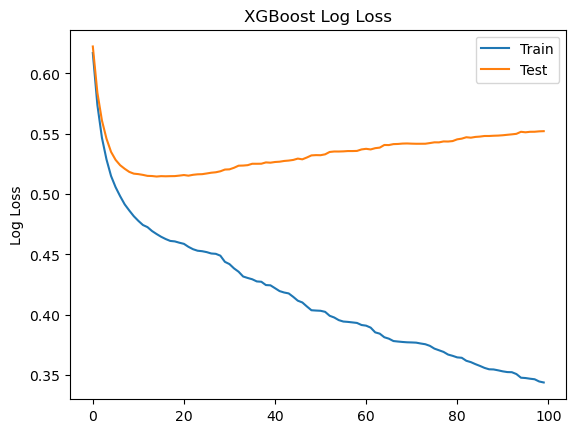

In [28]:
#plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

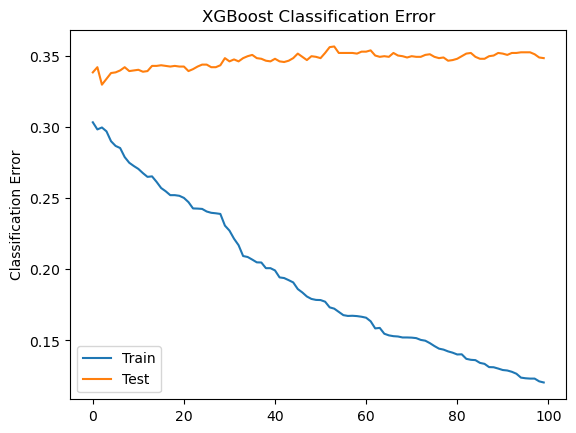

In [29]:
#plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()

In [30]:
xg_model = XGBClassifier(objective='binary:logistic', random_state=42, eval_metric= 'logloss')
eval_set = [(X_test, y_test)]
xg_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=eval_set, verbose=True)

[0]	validation_0-logloss:0.62236
[1]	validation_0-logloss:0.58412
[2]	validation_0-logloss:0.56101
[3]	validation_0-logloss:0.54594
[4]	validation_0-logloss:0.53502
[5]	validation_0-logloss:0.52837
[6]	validation_0-logloss:0.52395
[7]	validation_0-logloss:0.52098
[8]	validation_0-logloss:0.51842
[9]	validation_0-logloss:0.51695
[10]	validation_0-logloss:0.51656
[11]	validation_0-logloss:0.51592
[12]	validation_0-logloss:0.51511
[13]	validation_0-logloss:0.51498
[14]	validation_0-logloss:0.51456
[15]	validation_0-logloss:0.51488
[16]	validation_0-logloss:0.51477
[17]	validation_0-logloss:0.51487
[18]	validation_0-logloss:0.51492
[19]	validation_0-logloss:0.51532
[20]	validation_0-logloss:0.51580
[21]	validation_0-logloss:0.51527
[22]	validation_0-logloss:0.51599
[23]	validation_0-logloss:0.51640
[24]	validation_0-logloss:0.51652
[25]	validation_0-logloss:0.51710
[26]	validation_0-logloss:0.51772
[27]	validation_0-logloss:0.51809
[28]	validation_0-logloss:0.51891
[29]	validation_0-loglos

C:\Users\Junior\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=42, ...)

In [31]:
xg_pred = xg_model.predict(X_test)
predictions = [round(value) for value in xg_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100))

Accuracy: 65.73%


### Can we tune XG model to increase our accuracy?

In [32]:
#xg_tune = XGBClassifier(n_estimators=1000, learning_rate=0.05, n_jobs=4)
xg_tune = XGBClassifier(objective='binary:logistic', random_state=42, early_stopping_rounds=20, n_estimators=1000, learning_rate=0.05, n_jobs=4)
xg_tune.fit(X_train, y_train,eval_set=eval_set, verbose=True)

[0]	validation_0-logloss:0.67953
[1]	validation_0-logloss:0.66737
[2]	validation_0-logloss:0.65611
[3]	validation_0-logloss:0.64600
[4]	validation_0-logloss:0.63684
[5]	validation_0-logloss:0.62823
[6]	validation_0-logloss:0.62052
[7]	validation_0-logloss:0.61326
[8]	validation_0-logloss:0.60658
[9]	validation_0-logloss:0.60053
[10]	validation_0-logloss:0.59485
[11]	validation_0-logloss:0.58959
[12]	validation_0-logloss:0.58466
[13]	validation_0-logloss:0.58019
[14]	validation_0-logloss:0.57598
[15]	validation_0-logloss:0.57197
[16]	validation_0-logloss:0.56833
[17]	validation_0-logloss:0.56484
[18]	validation_0-logloss:0.56173
[19]	validation_0-logloss:0.55869
[20]	validation_0-logloss:0.55574
[21]	validation_0-logloss:0.55313
[22]	validation_0-logloss:0.55077
[23]	validation_0-logloss:0.54829
[24]	validation_0-logloss:0.54594
[25]	validation_0-logloss:0.54386
[26]	validation_0-logloss:0.54181
[27]	validation_0-logloss:0.53993
[28]	validation_0-logloss:0.53819
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=20,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=4, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [33]:
xg_tune_pred = xg_tune.predict(X_test)
predictions = [round(value) for value in xg_tune_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100))

Accuracy: 67.05%


In [34]:
import eli5
from eli5.sklearn import PermutationImportance

In [35]:
perm = PermutationImportance(xg_tune, random_state=42).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=X_test.columns.tolist())

Weight,Feature
0.0435 ± 0.0256,Weight_in_gms
0.0304 ± 0.0161,Discount_offered
0.0092 ± 0.0063,Customer_care_calls
0.0051 ± 0.0046,Prior_purchases
0.0032 ± 0.0040,Customer_rating
0.0013 ± 0.0017,Warehouse_block_C
0.0012 ± 0.0021,Product_importance_high
0.0002 ± 0.0019,Warehouse_block_A
0 ± 0.0000,Gender_M
-0.0000 ± 0.0010,Product_importance_low


## Random Search Cross Validation

In [36]:
# XGBoost parameters currently in use
xg_model.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': 'logloss',
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': 42,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [37]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

n_estimators = [0.0001, 0.001, 0.01, 0.1, 1]
max_depth = range(3,21,3)
#max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
#max_depth.append(None)
#max_depth = range(3,21,3)
gamma = [i/10.0 for i in range(0,5)]
colsample_bytree = [i/10.0 for i in range(3,10)]
reg_alpha = [0.00001, 0.01, 0.1, 1, 10, 100]
reg_lambda = [0.00001, 0.01, 0.1, 1, 10, 100]
#min_samples_split = [2, 5, 10]
#min_samples_leaf = [1, 2, 4]
#bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'gamma': gamma,
               'colsample_bytree': colsample_bytree,
               'reg_alpha': reg_alpha,
               'reg_lambda': reg_lambda
               }
#scoring = ['recall']
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
print(random_grid)


{'n_estimators': [0.0001, 0.001, 0.01, 0.1, 1], 'max_depth': range(3, 21, 3), 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4], 'colsample_bytree': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 'reg_alpha': [1e-05, 0.01, 0.1, 1, 10, 100], 'reg_lambda': [1e-05, 0.01, 0.1, 1, 10, 100]}


In [38]:
xg_random = RandomizedSearchCV(estimator=xg_model, param_distributions=random_grid, n_iter=100, cv=3, verbose=0, random_state=42, n_jobs=-1, error_score='raise')
xg_random.fit(X_train, y_train)

TypeError: 'float' object cannot be interpreted as an integer

In [39]:
xg_random.best_params_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

In [40]:
xg_random

RandomizedSearchCV(cv=3, error_score='raise',
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_const...
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=Non

In [41]:
xg_random.best_score_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_score_'

In [42]:
xg_random_pred = xg_random.predict(X_test)
predictions = [round(value) for value in xg_random_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100))

NotFittedError: This RandomizedSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

## Grid Search Cross Validation

In [43]:
param_grid = {
    'colsample_bytree': [0.3, 0.5, 0.8],
    'reg_alpha': [0, 0.5, 1, 5],
    'reg_lambda': [0, 0.5, 1, 5]
}

In [44]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=xg_model, param_grid=param_grid, n_jobs=-1, cv=kfold, verbose=0)
grid_result = grid_search.fit(X_train, y_train)

In [45]:
grid_result

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan

In [46]:
grid_result.best_params_

{'colsample_bytree': 0.5, 'reg_alpha': 5, 'reg_lambda': 5}

In [47]:
grid_result.best_score_

0.6650377841212577

In [48]:
xg_gs_pred = grid_result.predict(X_test)
predictions = [round(value) for value in xg_gs_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100))

Accuracy: 66.18%
